不確かさを考慮したスコア±10ラインを引くための調査  
https://github.com/tomii9273/atcoder_type_checker/pull/82

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy.stats import t

from const import HOSEICHI_FILE_PATH

N = np.load(HOSEICHI_FILE_PATH).T
weighted = True


x = N[0]
if weighted:
    y = N[2]
else:
    y = N[1]

y = y[np.argsort(x)]
x.sort()

In [2]:
times = round(103000 // len(x[np.where(x <= 2399)]))  # 2399以下のサンプルをtimes倍することで、2400以上のサンプル(全ユーザーを使っている)と合わせる
# times = 1

In [3]:
ind = np.where(x <= 2399)

In [4]:
for _ in range(times - 1):
    x = np.append(x,x[ind])
    y = np.append(y,y[ind])


In [5]:
y = y[np.argsort(x)]
x.sort()

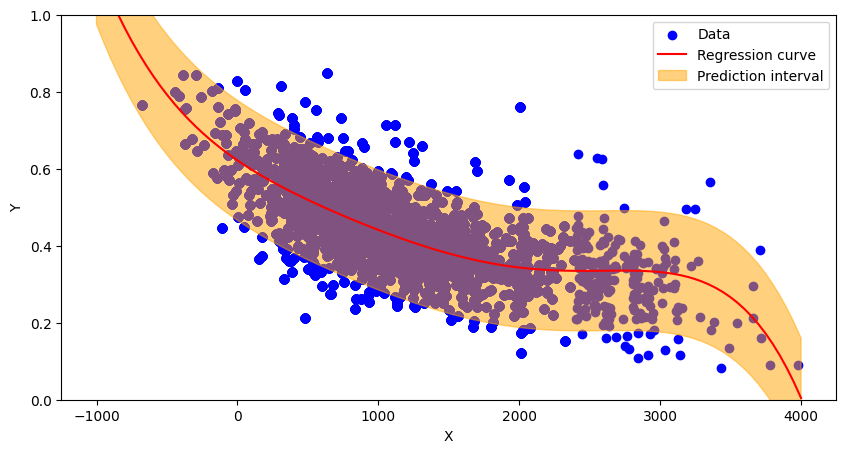

In [10]:


fig = plt.figure(figsize=(10, 5))

# p2 = np.poly1d(np.polyfit(x, y, DEGREE_OF_HOSEI_CURVE))

xp = np.linspace(-1000, 4000, 100)

# # # データ生成
# # np.random.seed(0)
# # x = np.linspace(0, 10, 100)
# # y = 3 + 2 * x + x ** 2 + np.random.normal(0, x, 100)
# # for i in range(len(y)):
# #     y[i] += i * (-1) ** (i%2)
# # x = np.sort(np.append(x, [3.9,4.1]))
# # y = np.sort(np.append(y, [0,40]))

# degree = 10

# # 2次の多項式特徴量を生成
# poly = PolynomialFeatures(degree=degree)
# X_poly = poly.fit_transform(x.reshape(-1, 1))


# # 2次の多項式回帰モデルをフィット
# model = LinearRegression()
# model.fit(X_poly, y)
# xp_poly = poly.fit_transform(xp.reshape(-1, 1))

# pred = model.predict(xp_poly)
# y_pred = model.predict(X_poly)

degree = 5
p2 = np.poly1d(np.polyfit(x, y, degree))
y_pred = p2(x)
pred = p2(xp)


# 残差平方和 (SSE)
sse = np.sum((y - y_pred)**2)

# 平均残差平方和 (MSE)
mse = sse / (len(y) - degree - 1)

# t値（t-distribution）を計算
alpha = 0.05  # 95%信頼区間（100% - alpha）
t_value = t.ppf(1.0 - alpha / 2.0, len(y) - degree - 1)

x_mean = np.mean(x)
sxx = np.var(x) * len(y)
k3 = (xp - x_mean)**2 / sxx

# 各xでの予測値の標準誤差
se_pred = np.sqrt(1 + 1 / len(x) + k3)

# 予測区間
margin = t_value * np.sqrt(mse) * se_pred

# グラフ描画
plt.scatter(x, y, label='Data', color='blue')
plt.plot(xp, pred, label='Regression curve', color='red')
plt.fill_between(xp, pred - margin, pred + margin, color='orange', alpha=0.5, label='Prediction interval')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.ylim([0,1])
# plt.xlim([0,4000])


plt.show()


In [84]:
x_mean

1023.0936765094247

In [77]:
margin

array([0.18924373, 0.18922462, 0.18920594, 0.18918771, 0.18916991,
       0.18915255, 0.18913563, 0.18911915, 0.1891031 , 0.1890875 ,
       0.18907233, 0.1890576 , 0.18904331, 0.18902946, 0.18901605,
       0.18900308, 0.18899054, 0.18897845, 0.1889668 , 0.18895558,
       0.1889448 , 0.18893447, 0.18892457, 0.18891512, 0.1889061 ,
       0.18889752, 0.18888939, 0.18888169, 0.18887443, 0.18886761,
       0.18886124, 0.1888553 , 0.18884981, 0.18884475, 0.18884014,
       0.18883596, 0.18883223, 0.18882893, 0.18882608, 0.18882366,
       0.18882169, 0.18882016, 0.18881907, 0.18881842, 0.18881821,
       0.18881843, 0.1888191 , 0.18882022, 0.18882177, 0.18882376,
       0.18882619, 0.18882906, 0.18883238, 0.18883613, 0.18884032,
       0.18884496, 0.18885003, 0.18885555, 0.1888615 , 0.1888679 ,
       0.18887473, 0.18888201, 0.18888972, 0.18889788, 0.18890648,
       0.18891551, 0.18892499, 0.1889349 , 0.18894526, 0.18895605,
       0.18896729, 0.18897896, 0.18899107, 0.18900362, 0.18901

In [46]:
type(p2)

numpy.poly1d

In [36]:
sxx

581870.0217682023

In [31]:
se_pred

array([ 129991.18070494,   54731.09723062,   48434.84056837, ...,
       3905674.00961257, 4038276.34350357, 4475514.91938545])

In [25]:
X_poly

array([[ 1.00000000e+00, -6.77867482e+02,  4.59504324e+05],
       [ 1.00000000e+00, -4.39850013e+02,  1.93468034e+05],
       [ 1.00000000e+00, -4.13777047e+02,  1.71211445e+05],
       ...,
       [ 1.00000000e+00,  3.71566097e+03,  1.38061365e+07],
       [ 1.00000000e+00,  3.77821009e+03,  1.42748714e+07],
       [ 1.00000000e+00,  3.97749453e+03,  1.58204627e+07]])

以下下書き

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 生成するデータポイント数
n_points = 100

# 疑似データの生成
x = np.linspace(0, 10, n_points)
y1 = 2 * x + 1 + np.random.normal(0, 2, n_points)  # 1つ目のy軸のデータ
y2 = x ** 2 + np.random.normal(0, 5, n_points)  # 2つ目のy軸bのデータ

# 2次の多項式特徴量を生成
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(x.reshape(-1, 1))

# 2次の多項式回帰モデルをフィット
model = LinearRegression()
model.fit(X_poly, y2)
y2_pred = model.predict(X_poly)


In [ ]:
y2

In [ ]:
y2_pred

In [ ]:
std_dev

In [ ]:
# プロット作成
fig, ax1 = plt.subplots()

# 1つ目のy軸に対するプロット
ax1.scatter(x, y1, label='Data 1', color='b')
ax1.set_xlabel('X')
ax1.set_ylabel('Y1', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# 2つ目のy軸に対するプロット
ax2 = ax1.twinx()
ax2.scatter(x, y2, label='Data 2', color='g')
ax2.set_ylabel('Y2', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# 2次の回帰曲線を描画
ax2.plot(x, y2_pred, color='r', label='2nd order fit')

# 標準偏差の計算
std_dev = np.std(y2 - y2_pred)

# 標準偏差の線を描画
ax2.fill_between(x, y2_pred - std_dev, y2_pred + std_dev, color='orange', alpha=0.5, label='1 std dev')

# 凡例の追加
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


In [ ]:
plt.show()

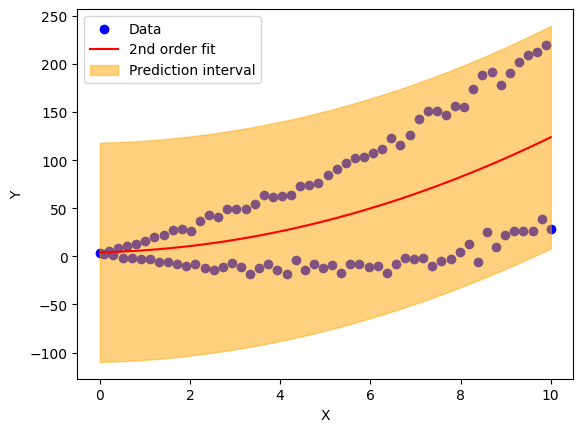

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy.stats import t

# データ生成
np.random.seed(0)
x = np.linspace(0, 10, 100)
y = 3 + 2 * x + x ** 2 + np.random.normal(0, x, 100)
for i in range(len(y)):
    y[i] += i * (-1) ** (i%2)
# x = np.sort(np.append(x, [3.9,4.1]))
# y = np.sort(np.append(y, [0,40]))


# 2次の多項式特徴量を生成
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(x.reshape(-1, 1))

# 2次の多項式回帰モデルをフィット
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

# 残差平方和 (SSE)
sse = np.sum((y - y_pred)**2)

# 平均残差平方和 (MSE)
mse = sse / (len(y) - 3)  # degree=2 なので3個のパラメータ（a, b, c）

# t値（t-distribution）を計算
alpha = 0.05  # 95%信頼区間（100% - alpha）
t_value = t.ppf(1.0 - alpha / 2.0, len(y) - 3)

# 各xでの予測値の標準誤差
se_pred = np.sqrt(1 + np.sum(X_poly**2, axis=1) / np.sum((y - y_pred)**2))

# 予測区間
margin = t_value * np.sqrt(mse) * se_pred

# グラフ描画
plt.scatter(x, y, label='Data', color='blue')
plt.plot(x, y_pred, label='2nd order fit', color='red')
plt.fill_between(x, y_pred - margin, y_pred + margin, color='orange', alpha=0.5, label='Prediction interval')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
